In [1]:
!pip install shap
import numpy as np
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

import shap

np.random.seed(101)
shap.initjs()

In [2]:
corpus, y = shap.datasets.imdb()
corpus_train, corpus_test, y_train, y_test = train_test_split(
    corpus, y, test_size=0.2, random_state=7
)

vectorizer = TfidfVectorizer(min_df=10)
X_train = vectorizer.fit_transform(
    corpus_train
).toarray()  # sparse also works but Explanation slicing is not yet supported
X_test = vectorizer.transform(corpus_test).toarray()

In [19]:
vectorizer.get_feature_names_out()

array(['00', '000', '007', ..., 'zorro', 'zu', 'zucker'], dtype=object)

In [4]:
model = sklearn.linear_model.LogisticRegression(penalty="l2")
model.fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

       False       0.88      0.89      0.88      2426
        True       0.89      0.88      0.89      2574

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



In [5]:
explainer = shap.Explainer(
    model, X_train, feature_names=vectorizer.get_feature_names_out()
)
shap_values = explainer(X_test)

In [20]:
explainer.expected_value

np.float64(-0.12998222144053811)

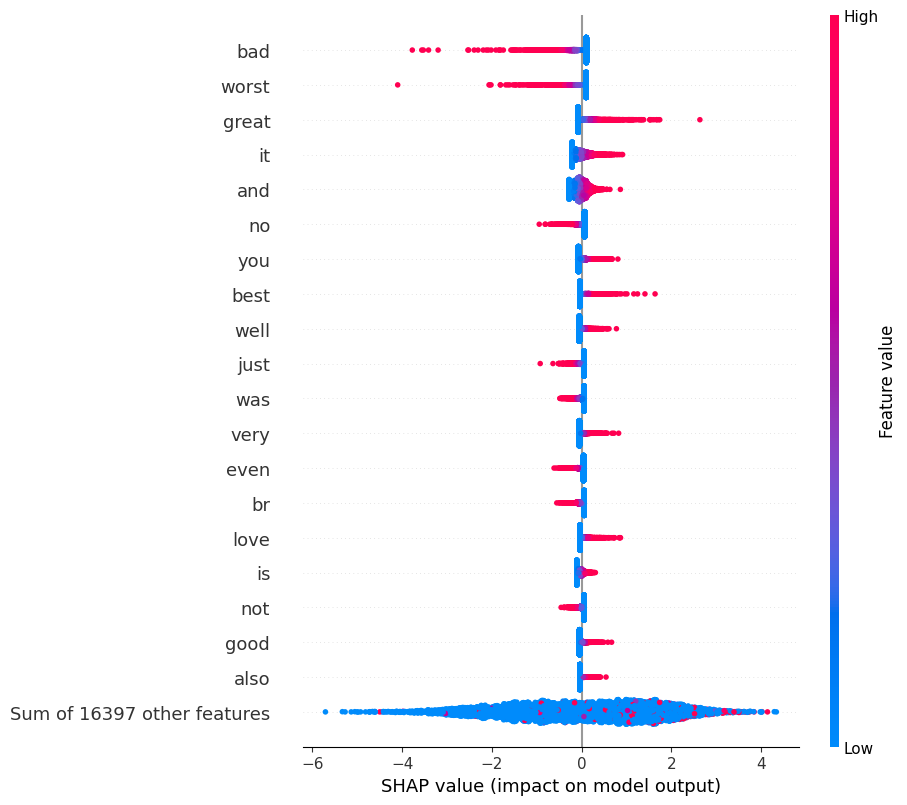

In [21]:
shap.plots.beeswarm(shap_values, max_display=20)

In [24]:
ind = 1
shap.initjs()
shap.plots.force(shap_values[ind], matplotlib=False)

In [25]:
print("Positive" if y_test[ind] else "Negative", "Review:")
print(corpus_test[ind])
print(model.predict(X_test)[ind])

Negative Review:
I don't understand the positive comments made about this film. It is cheap and nasty on all levels and I cannot understand how it ever got made.<br /><br />Cartoon characters abound - Sue's foul-mouthed, alcoholic, layabout, Irish father being a prime example. None of the characters are remotely sympathetic - except, briefly, for Sue's Asian boyfriend but even he then turns out to be capable of domestic violence! As desperately unattractive as they both are, I've no idea why either Rita and/or Sue would throw themselves at a consummate creep like Bob - but given that they do, why should I be expected to care what happens to them? So many reviews keep carping on about how "realistic" it is. If that is true, it is a sad reflection on society but no reason to put it on film.<br /><br />I didn't like the film at all.

False


In [9]:
ind = 1
shap.initjs()
shap.plots.force(shap_values[ind])

In [10]:
print("Positive" if y_test[ind] else "Negative", "Review:")
print(corpus_test[ind])
print(model.predict(X_test)[ind])

Negative Review:
I don't understand the positive comments made about this film. It is cheap and nasty on all levels and I cannot understand how it ever got made.<br /><br />Cartoon characters abound - Sue's foul-mouthed, alcoholic, layabout, Irish father being a prime example. None of the characters are remotely sympathetic - except, briefly, for Sue's Asian boyfriend but even he then turns out to be capable of domestic violence! As desperately unattractive as they both are, I've no idea why either Rita and/or Sue would throw themselves at a consummate creep like Bob - but given that they do, why should I be expected to care what happens to them? So many reviews keep carping on about how "realistic" it is. If that is true, it is a sad reflection on society but no reason to put it on film.<br /><br />I didn't like the film at all.

False


In [11]:
ind = 2
shap.initjs()
shap.plots.force(shap_values[ind])

In [12]:
print("Positive" if y_test[ind] else "Negative", "Review:")
print(corpus_test[ind])
print(model.predict(X_test)[ind])

Positive Review:
I finally saw this film tonight after renting it at Blockbuster (VHS). I have to agree that it is wildly original. Yes, maybe the characters were not fully realized but it isn't one of those movies. Rather, we are treated to the director's eye, his vision of what the story is about. And it does not stop. And to be honest, I didn't want it to. I do believe that Sabu had to have influenced the director's of 'Lock, Stock & Two Smoking Barrels' and 'Run, Lola, Run'. But I absolutely loved the way the three leads SEE the beautiful woman on the street to distract them momentarily. I really need to see this director's other work because this film really intrigued me. If you want insight, culture, sturm und drang, go somewhere else. If you want a laugh, camera movement and criminal hilarity, look here.

False
